In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
df = pd.read_csv(r"/Users/nithyasanthoshini/Downloads/Restaurant_Reviews.tsv", delimiter = '\t')

In [5]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## Text Preprocessing 

In [6]:
review = df["Review"][0]

In [7]:
review

'Wow... Loved this place.'

## Removing Unwanted Puncuations

In [8]:
import re

In [9]:
re_punct = "[^A-Za-z0-9!?\s]"

In [10]:
review = re.sub(re_punct, "",review)

In [11]:
review

'Wow Loved this place'

## Normalising the case

In [12]:
review = review.lower()

In [13]:
review

'wow loved this place'

In [14]:
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nithyasanthoshini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords

In [17]:
sw_list = stopwords.words("english")

In [18]:
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Tokenization

In [19]:
review = review.split()

In [20]:
review

['wow', 'loved', 'this', 'place']

## Removing StopWords

In [21]:
temp_review = review.copy()
for word in temp_review:
    if word in sw_list:
        review.remove(word)
    
## or

#review = [word for word in review if word not in sw_list]

In [22]:
review

['wow', 'loved', 'place']

## Removal of stop words and lemmatization

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download("wordnet")
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nithyasanthoshini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
review_new = []
for word in review:
    review_new.append(lemma.lemmatize(word,pos="v")) 
    
#or
#review = [lemma.lemmatize(word,pos="v") for word in review]

In [25]:
review

['wow', 'loved', 'place']

In [26]:
review = [lemma.lemmatize(word,pos="v") for word in review if word not in sw_list]

In [27]:
review

['wow', 'love', 'place']

In [28]:
" ".join(review)

'wow love place'

In [29]:
n_stop_word = ["not","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [30]:
for word in n_stop_word:
    if word in sw_list:
        sw_list.remove(word)

In [31]:
def text_preprocessing(review):
    '''
    Preprocesses the given sentence
    '''
    ## Removing Unwanted Puncuations
    re_punct = "[^A-Za-z\s]"
    review = re.sub(re_punct, "",review)
    ## Normalising the case
    review = review.lower()
    ## Tokenization
    review = review.split()
    ## Removing StopWords
    review = [word for word in review if word not in sw_list]
    ## Removal of stop words and lemmatization
    review = [lemma.lemmatize(word,pos="v") for word in review if word not in sw_list]
    ## Join 
    review = " ".join(review)
    return review

In [32]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [33]:
df["Review"]=df["Review"].apply(text_preprocessing)

In [34]:
df

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall not impress would not go back,0
998,whole experience underwhelming think well go n...,0


In [35]:
#Top 10 Words in terms of frequency

In [36]:
para = " ".join(df['Review'])

In [37]:
para

'wow love place crust not good not tasty texture nasty stop late may bank holiday rick steve recommendation love selection menu great price get angry want damn pho honeslty didnt taste fresh potatoes like rubber could tell make ahead time keep warmer fry great great touch service prompt would not go back cashier care ever say still end wayyy overprice try cape cod ravoli chicken cranberrymmmm disgust pretty sure human hair shock sign indicate cash highly recommend waitress little slow service place not worth time let alone vegas not like burrittos blah food amaze service also cute could care less interior beautiful perform thats rightthe red velvet cakeohhh stuff good never bring salad ask hole wall great mexican street tacos friendly staff take hour get food table restaurant food luke warm sever run around like totally overwhelm worst salmon sashimi also combos like burger fry beer decent deal like final blow find place accident could not happier seem like good quick place grab bite f

In [38]:
#Dictionary word, value

In [39]:
word_count = {}.fromkeys(para.split(),0)
for word in para.split():
    if word in word_count:
        word_count[word]+=1

In [40]:
word_count

{'wow': 3,
 'love': 31,
 'place': 112,
 'crust': 2,
 'not': 116,
 'good': 95,
 'tasty': 11,
 'texture': 3,
 'nasty': 3,
 'stop': 4,
 'late': 2,
 'may': 5,
 'bank': 1,
 'holiday': 1,
 'rick': 1,
 'steve': 1,
 'recommendation': 3,
 'selection': 10,
 'menu': 15,
 'great': 70,
 'price': 21,
 'get': 47,
 'angry': 1,
 'want': 17,
 'damn': 4,
 'pho': 6,
 'honeslty': 1,
 'didnt': 13,
 'taste': 22,
 'fresh': 14,
 'potatoes': 3,
 'like': 51,
 'rubber': 1,
 'could': 16,
 'tell': 9,
 'make': 26,
 'ahead': 1,
 'time': 55,
 'keep': 5,
 'warmer': 1,
 'fry': 16,
 'touch': 3,
 'service': 84,
 'prompt': 1,
 'would': 28,
 'go': 76,
 'back': 61,
 'cashier': 2,
 'care': 4,
 'ever': 28,
 'say': 26,
 'still': 11,
 'end': 4,
 'wayyy': 1,
 'overprice': 8,
 'try': 17,
 'cape': 1,
 'cod': 1,
 'ravoli': 1,
 'chicken': 17,
 'cranberrymmmm': 1,
 'disgust': 4,
 'pretty': 19,
 'sure': 8,
 'human': 2,
 'hair': 2,
 'shock': 1,
 'sign': 2,
 'indicate': 1,
 'cash': 1,
 'highly': 4,
 'recommend': 15,
 'waitress': 9,
 'lit

In [41]:
top_15_words = pd.Series(para.split()).value_counts().sort_values(ascending = False).head(15)

<Axes: >

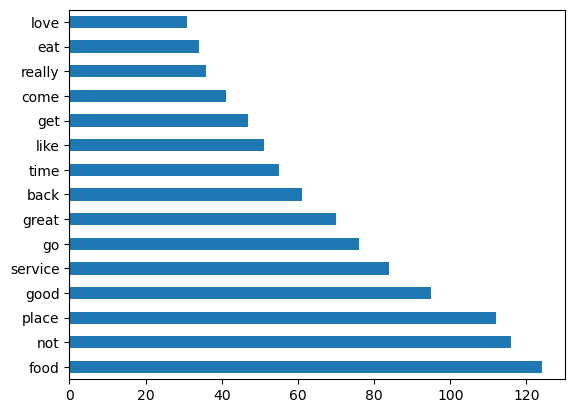

In [42]:
top_15_words.plot(kind = 'barh')

In [43]:
# top 10 positive word based on frequency

In [44]:
positive_para = " ".join(df[df['Liked'] == 1]["Review"])

In [45]:
pd.Series(positive_para.split()).value_counts().sort_values(ascending = False).head(20)

good          73
great         70
food          60
place         60
service       46
go            29
love          28
time          26
friendly      23
delicious     23
back          23
nice          22
best          22
really        22
amaze         21
like          20
also          18
not           18
come          18
restaurant    17
Name: count, dtype: int64

In [46]:
negative_para = " ".join(df[df['Liked'] == 0]["Review"])
pd.Series(negative_para.split()).value_counts().sort_values(ascending = False).head(20)

not           98
food          64
place         52
go            47
back          38
service       38
get           34
like          31
time          29
wait          26
dont          25
come          23
never         22
eat           22
good          22
would         21
minutes       19
disappoint    19
ever          19
bad           18
Name: count, dtype: int64

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud 

In [49]:
wc = WordCloud()

In [50]:
wc

In [51]:
para

'wow love place crust not good not tasty texture nasty stop late may bank holiday rick steve recommendation love selection menu great price get angry want damn pho honeslty didnt taste fresh potatoes like rubber could tell make ahead time keep warmer fry great great touch service prompt would not go back cashier care ever say still end wayyy overprice try cape cod ravoli chicken cranberrymmmm disgust pretty sure human hair shock sign indicate cash highly recommend waitress little slow service place not worth time let alone vegas not like burrittos blah food amaze service also cute could care less interior beautiful perform thats rightthe red velvet cakeohhh stuff good never bring salad ask hole wall great mexican street tacos friendly staff take hour get food table restaurant food luke warm sever run around like totally overwhelm worst salmon sashimi also combos like burger fry beer decent deal like final blow find place accident could not happier seem like good quick place grab bite f

In [52]:
wc.generate_from_frequencies(word_count)

In [53]:
word_count

{'wow': 3,
 'love': 31,
 'place': 112,
 'crust': 2,
 'not': 116,
 'good': 95,
 'tasty': 11,
 'texture': 3,
 'nasty': 3,
 'stop': 4,
 'late': 2,
 'may': 5,
 'bank': 1,
 'holiday': 1,
 'rick': 1,
 'steve': 1,
 'recommendation': 3,
 'selection': 10,
 'menu': 15,
 'great': 70,
 'price': 21,
 'get': 47,
 'angry': 1,
 'want': 17,
 'damn': 4,
 'pho': 6,
 'honeslty': 1,
 'didnt': 13,
 'taste': 22,
 'fresh': 14,
 'potatoes': 3,
 'like': 51,
 'rubber': 1,
 'could': 16,
 'tell': 9,
 'make': 26,
 'ahead': 1,
 'time': 55,
 'keep': 5,
 'warmer': 1,
 'fry': 16,
 'touch': 3,
 'service': 84,
 'prompt': 1,
 'would': 28,
 'go': 76,
 'back': 61,
 'cashier': 2,
 'care': 4,
 'ever': 28,
 'say': 26,
 'still': 11,
 'end': 4,
 'wayyy': 1,
 'overprice': 8,
 'try': 17,
 'cape': 1,
 'cod': 1,
 'ravoli': 1,
 'chicken': 17,
 'cranberrymmmm': 1,
 'disgust': 4,
 'pretty': 19,
 'sure': 8,
 'human': 2,
 'hair': 2,
 'shock': 1,
 'sign': 2,
 'indicate': 1,
 'cash': 1,
 'highly': 4,
 'recommend': 15,
 'waitress': 9,
 'lit

In [54]:
reviews_wc = wc.generate(para)

In [55]:
reviews_wc

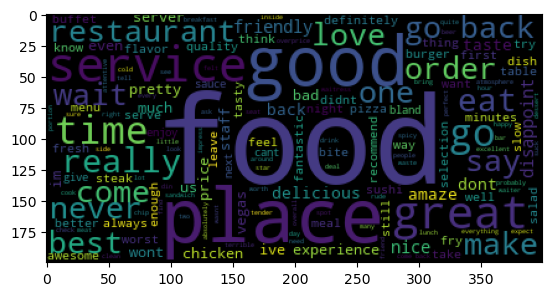

In [56]:
plt.imshow(reviews_wc)

## Count of Bag of Words

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer()

In [60]:
X = cv.fit_transform(df["Review"]).toarray()

In [61]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
X.shape

(1000, 1693)

In [63]:
cv.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [64]:
X = pd.DataFrame(X, columns = cv.get_feature_names_out())

In [65]:
X

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X["place"]

0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: place, Length: 1000, dtype: int64

In [67]:
y = df["Liked"]

In [68]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

## Split into train and test

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Building the ML Model

In [112]:
#Import the Model class
from sklearn.naive_bayes import GaussianNB

In [113]:
#Create a instance or object of the model

nb_model = GaussianNB()

In [114]:
# Train the ML Model -- Feed the data to the ML Algorithm

nb_model.fit(X_train, y_train)

GaussianNB()

In [115]:
#nb_model --- Trained model

## Prediction

In [116]:
X_test

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
y_pred = nb_model.predict(X_test)

In [118]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0])

In [119]:
y_test

507    0
818    0
452    0
368    1
242    0
      ..
430    0
874    0
550    1
608    1
207    0
Name: Liked, Length: 200, dtype: int64

## Evaluation

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
test_accuracy = accuracy_score(y_test, y_pred)

In [122]:
test_accuracy 

0.715

In [123]:
print("Test Accuracy Score::", test_accuracy * 100, " %")

Test Accuracy Score:: 71.5  %


In [124]:
y_pred_train = nb_model.predict(X_train)

In [125]:
train_accuracy = accuracy_score(y_train, y_pred_train)

In [126]:
train_accuracy

0.94125

In [127]:
print("Train Accuracy Score::", train_accuracy * 100, " %")

Train Accuracy Score:: 94.125  %


## Real Time Prediction

In [128]:
new_words = []

In [129]:
review_new = "food was really good"

In [130]:
review_new = text_preprocessing(review_new)

In [131]:
review_new

'food really good'

In [91]:
# for word in review_new.split():
#     if word not in cv.vocabulary_:
#         with open("new_word.txt", "a") as f:
#             f.write(word + "\n")

## Save the Model

In [132]:
import joblib
nb_model.bow = cv

In [134]:
joblib.dump(nb_model, "sentiment_analysis_tfidf.pkl")

['sentiment_analysis_tfidf.pkl']

## TF-IDF Vectorizer

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tf_idf = TfidfVectorizer()

In [96]:
X = tf_idf.fit_transform(df["Review"]).toarray()

In [97]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
X.shape

(1000, 1693)

In [99]:
X = pd.DataFrame(X, columns = tf_idf.get_feature_names_out())

In [100]:
X

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
X[["wow","love","place","not","good","crust"]]

,wow,love,place,not,good,crust
0,0.765314,0.521322,0.377515,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.385881,0.410819,0.826029
2,0.000000,0.000000,0.000000,0.284979,0.000000,0.000000
3,0.000000,0.223830,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.000000,0.000000,0.000000,0.513427,0.000000,0.000000
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [135]:
nb_model.tf_idf = tf_idf

In [136]:
nltk.__version__

'3.8.1'